# IRT Analysis across Multiple Datasets

This notebook performs analysis (CFA) on multiple datasets (ImageNet, ImageNet V2, and ImageNet R). The analyses explore local independence across these datasets. For each dataset, we compute the residuals based on the binary-transformed datasets. Highly correlated items pairs can then be identified through threshold values and visually through a heatmap.

In [9]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Define dataset filenames (processed binary versions)
datasets = {
    "ImageNet": r"e:/thesis/irtnet/data/Binary Processed/Binary_Transformed_ImageNet.csv",
    "ImageNet-Sketch": r"e:/thesis/irtnet/data/Binary Processed/Binary_Transformed_ImageNet-Sketch.csv",
    "ImageNet-V2": r"e:/thesis/irtnet/data/Binary Processed/Binary_Transformed_ImageNet-V2.csv",
    "ImageNet-R": r"e:/thesis/irtnet/data/Binary Processed/Binary_Transformed_ImageNet-R.csv"
}


In [11]:
# Set threshold for identifying local dependence
threshold = 0.2

def process_dataset(name, file_path):
    print(f"\nProcessing {name} for Local Independence Check...")
    try:
        df = pd.read_csv(file_path)
        expected_probs = df.mean(axis=0)
        residuals = df - expected_probs
        residual_corr_matrix = np.corrcoef(residuals, rowvar=False)
        residual_corr_df = pd.DataFrame(residual_corr_matrix, index=df.columns, columns=df.columns)
        high_corr_pairs = np.where((residual_corr_matrix > threshold) & (residual_corr_matrix < 1.0))
        high_corr_items = [(df.columns[i], df.columns[j], residual_corr_matrix[i, j]) for i, j in zip(*high_corr_pairs)]
        high_corr_df = pd.DataFrame(high_corr_items, columns=["Item 1", "Item 2", "Correlation"])
        print(f"Completed {name} analysis.")
        plt.figure(figsize=(12, 8))
        sns.heatmap(residual_corr_df, annot=False, cmap="coolwarm", linewidths=0.5)
        plt.title(f"Residual Correlation Heatmap - {name}")
        plt.show()
        display(high_corr_df)
        return {"High Correlation Items": high_corr_df, "Residual Correlation Matrix": residual_corr_df}
    except FileNotFoundError:
        print(f"File for {name} not found at path: {file_path}. Please verify the file location.")

## ImageNet


Processing ImageNet for Local Independence Check...
Completed ImageNet analysis.


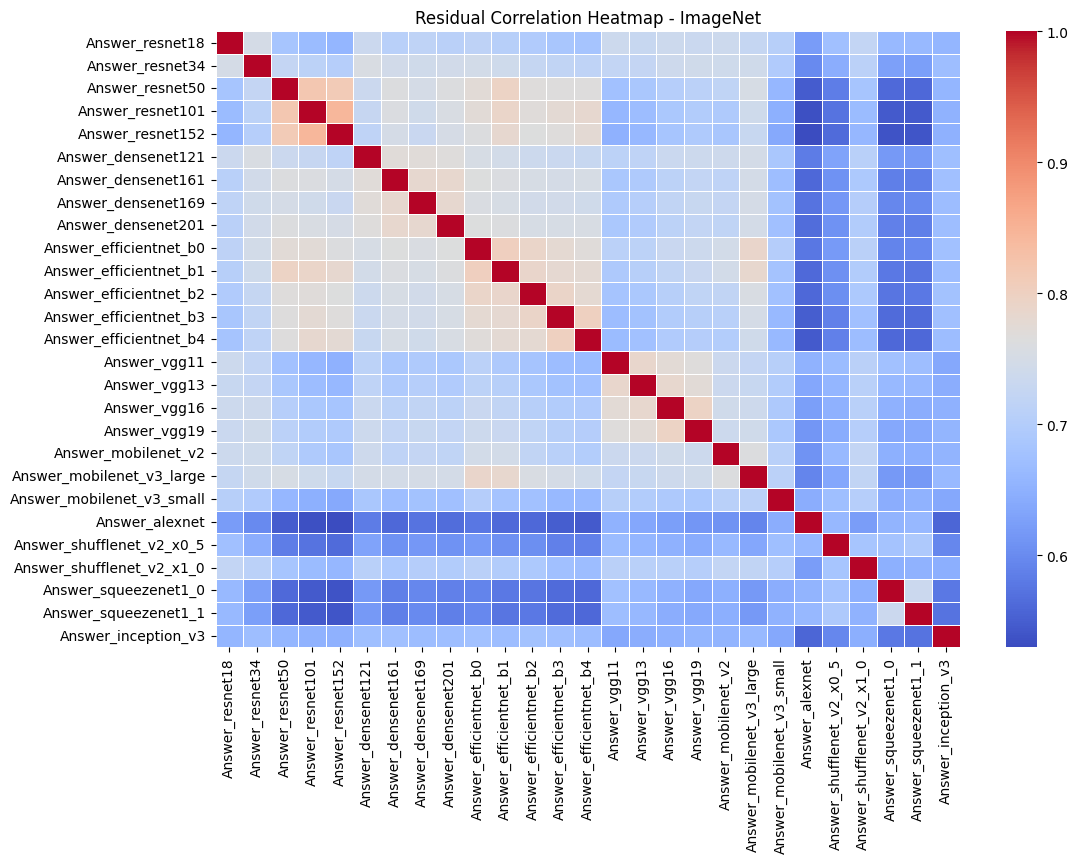

,Item 1,Item 2,Correlation
0,Answer_resnet18,Answer_resnet34,0.748620
1,Answer_resnet18,Answer_resnet50,0.683374
2,Answer_resnet18,Answer_resnet101,0.666683
3,Answer_resnet18,Answer_resnet152,0.657420
4,Answer_resnet18,Answer_densenet121,0.734888
...,...,...,...
699,Answer_inception_v3,Answer_alexnet,0.558427
700,Answer_inception_v3,Answer_shufflenet_v2_x0_5,0.594586
701,Answer_inception_v3,Answer_shufflenet_v2_x1_0,0.646072
702,Answer_inception_v3,Answer_squeezenet1_0,0.578600


{'High Correlation Items':                   Item 1                     Item 2  Correlation
 0        Answer_resnet18            Answer_resnet34     0.748620
 1        Answer_resnet18            Answer_resnet50     0.683374
 2        Answer_resnet18           Answer_resnet101     0.666683
 3        Answer_resnet18           Answer_resnet152     0.657420
 4        Answer_resnet18         Answer_densenet121     0.734888
 ..                   ...                        ...          ...
 699  Answer_inception_v3             Answer_alexnet     0.558427
 700  Answer_inception_v3  Answer_shufflenet_v2_x0_5     0.594586
 701  Answer_inception_v3  Answer_shufflenet_v2_x1_0     0.646072
 702  Answer_inception_v3       Answer_squeezenet1_0     0.578600
 703  Answer_inception_v3       Answer_squeezenet1_1     0.573450
 
 [704 rows x 3 columns],
 'Residual Correlation Matrix':                            Answer_resnet18  Answer_resnet34  Answer_resnet50  \
 Answer_resnet18                   1.000000

In [12]:
process_dataset("ImageNet", datasets["ImageNet"])


## ImageNet V2


Processing ImageNet-V2 for Local Independence Check...
Completed ImageNet-V2 analysis.


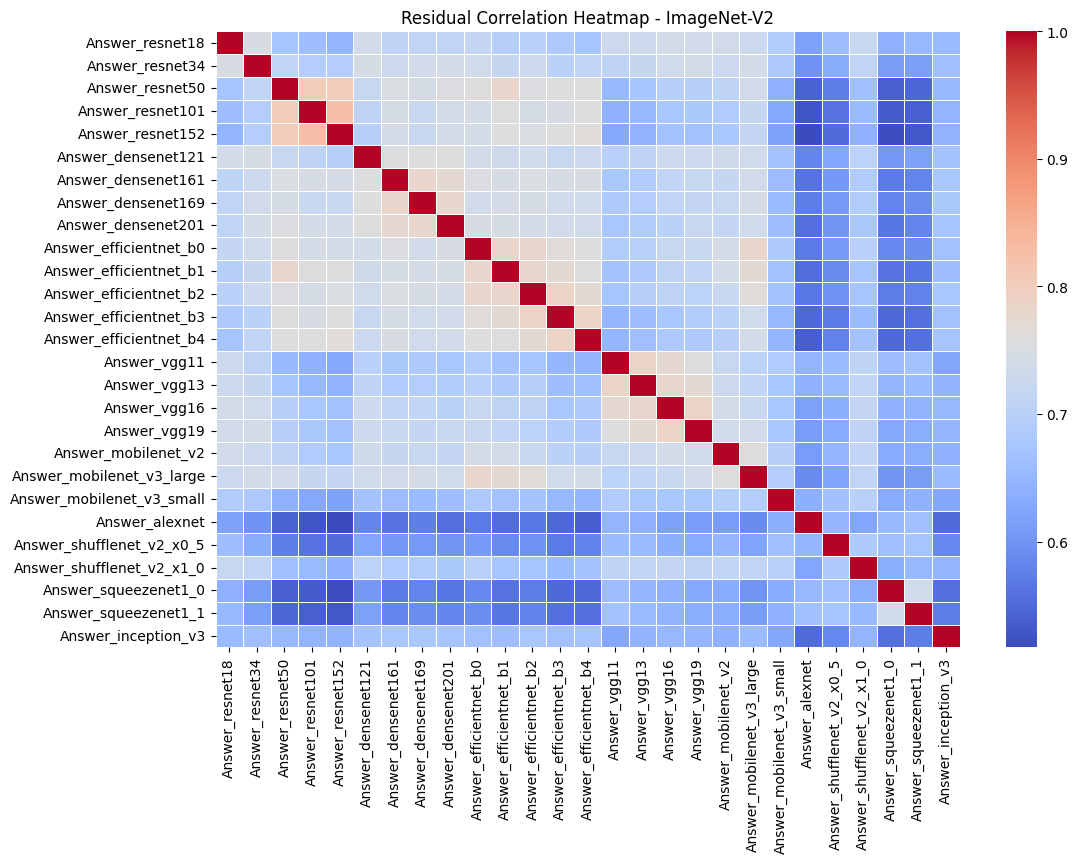

,Item 1,Item 2,Correlation
0,Answer_resnet18,Answer_resnet34,0.748934
1,Answer_resnet18,Answer_resnet50,0.674625
2,Answer_resnet18,Answer_resnet101,0.660780
3,Answer_resnet18,Answer_resnet152,0.646264
4,Answer_resnet18,Answer_densenet121,0.738895
...,...,...,...
703,Answer_inception_v3,Answer_alexnet,0.551016
704,Answer_inception_v3,Answer_shufflenet_v2_x0_5,0.585400
705,Answer_inception_v3,Answer_shufflenet_v2_x1_0,0.647069
706,Answer_inception_v3,Answer_squeezenet1_0,0.558451


{'High Correlation Items':                   Item 1                     Item 2  Correlation
 0        Answer_resnet18            Answer_resnet34     0.748934
 1        Answer_resnet18            Answer_resnet50     0.674625
 2        Answer_resnet18           Answer_resnet101     0.660780
 3        Answer_resnet18           Answer_resnet152     0.646264
 4        Answer_resnet18         Answer_densenet121     0.738895
 ..                   ...                        ...          ...
 703  Answer_inception_v3             Answer_alexnet     0.551016
 704  Answer_inception_v3  Answer_shufflenet_v2_x0_5     0.585400
 705  Answer_inception_v3  Answer_shufflenet_v2_x1_0     0.647069
 706  Answer_inception_v3       Answer_squeezenet1_0     0.558451
 707  Answer_inception_v3       Answer_squeezenet1_1     0.572483
 
 [708 rows x 3 columns],
 'Residual Correlation Matrix':                            Answer_resnet18  Answer_resnet34  Answer_resnet50  \
 Answer_resnet18                   1.000000

In [17]:
process_dataset("ImageNet-V2", datasets["ImageNet-V2"])

## ImageNet-R


Processing ImageNet-R for Local Independence Check...
Completed ImageNet-R analysis.


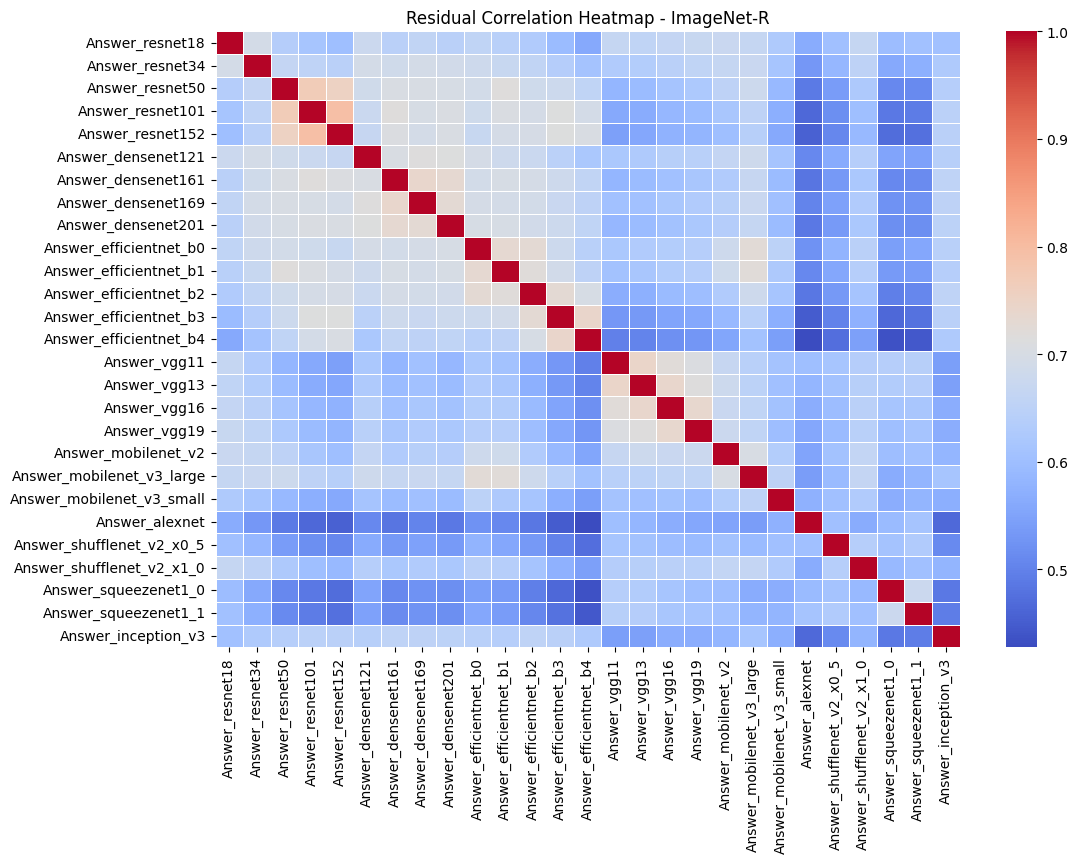

,Item 1,Item 2,Correlation
0,Answer_resnet18,Answer_resnet34,0.693362
1,Answer_resnet18,Answer_resnet50,0.637269
2,Answer_resnet18,Answer_resnet101,0.613737
3,Answer_resnet18,Answer_resnet152,0.599671
4,Answer_resnet18,Answer_densenet121,0.677473
...,...,...,...
706,Answer_inception_v3,Answer_alexnet,0.466633
707,Answer_inception_v3,Answer_shufflenet_v2_x0_5,0.510918
708,Answer_inception_v3,Answer_shufflenet_v2_x1_0,0.581692
709,Answer_inception_v3,Answer_squeezenet1_0,0.486649


{'High Correlation Items':                   Item 1                     Item 2  Correlation
 0        Answer_resnet18            Answer_resnet34     0.693362
 1        Answer_resnet18            Answer_resnet50     0.637269
 2        Answer_resnet18           Answer_resnet101     0.613737
 3        Answer_resnet18           Answer_resnet152     0.599671
 4        Answer_resnet18         Answer_densenet121     0.677473
 ..                   ...                        ...          ...
 706  Answer_inception_v3             Answer_alexnet     0.466633
 707  Answer_inception_v3  Answer_shufflenet_v2_x0_5     0.510918
 708  Answer_inception_v3  Answer_shufflenet_v2_x1_0     0.581692
 709  Answer_inception_v3       Answer_squeezenet1_0     0.486649
 710  Answer_inception_v3       Answer_squeezenet1_1     0.494355
 
 [711 rows x 3 columns],
 'Residual Correlation Matrix':                            Answer_resnet18  Answer_resnet34  Answer_resnet50  \
 Answer_resnet18                   1.000000

In [18]:
process_dataset("ImageNet-R", datasets["ImageNet-R"])

## ImageNet-Sketch


Processing ImageNet-Sketch for Local Independence Check...
Completed ImageNet-Sketch analysis.


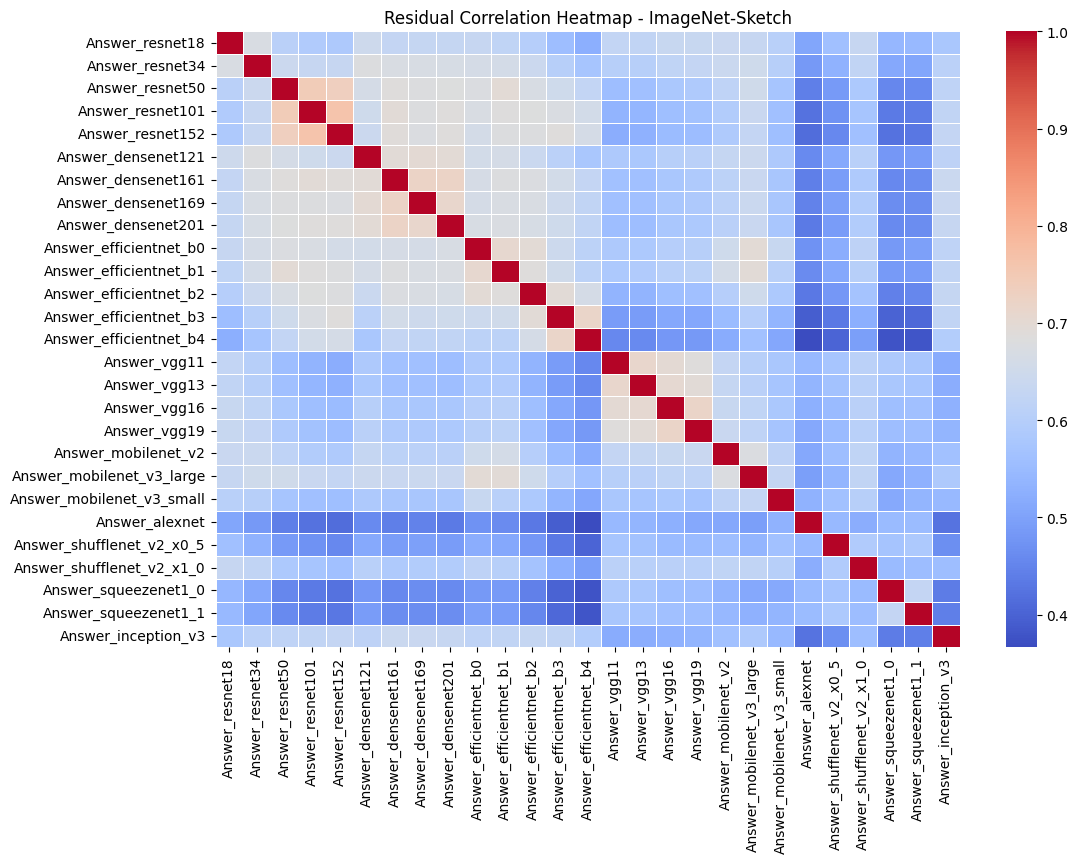

,Item 1,Item 2,Correlation
0,Answer_resnet18,Answer_resnet34,0.672360
1,Answer_resnet18,Answer_resnet50,0.606511
2,Answer_resnet18,Answer_resnet101,0.589896
3,Answer_resnet18,Answer_resnet152,0.584723
4,Answer_resnet18,Answer_densenet121,0.648128
...,...,...,...
703,Answer_inception_v3,Answer_shufflenet_v2_x0_5,0.465704
704,Answer_inception_v3,Answer_shufflenet_v2_x1_0,0.554706
705,Answer_inception_v3,Answer_squeezenet1_0,0.437965
706,Answer_inception_v3,Answer_squeezenet1_1,0.442963


{'High Correlation Items':                   Item 1                     Item 2  Correlation
 0        Answer_resnet18            Answer_resnet34     0.672360
 1        Answer_resnet18            Answer_resnet50     0.606511
 2        Answer_resnet18           Answer_resnet101     0.589896
 3        Answer_resnet18           Answer_resnet152     0.584723
 4        Answer_resnet18         Answer_densenet121     0.648128
 ..                   ...                        ...          ...
 703  Answer_inception_v3  Answer_shufflenet_v2_x0_5     0.465704
 704  Answer_inception_v3  Answer_shufflenet_v2_x1_0     0.554706
 705  Answer_inception_v3       Answer_squeezenet1_0     0.437965
 706  Answer_inception_v3       Answer_squeezenet1_1     0.442963
 707  Answer_inception_v3        Answer_inception_v3     1.000000
 
 [708 rows x 3 columns],
 'Residual Correlation Matrix':                            Answer_resnet18  Answer_resnet34  Answer_resnet50  \
 Answer_resnet18                   1.000000

In [19]:
process_dataset("ImageNet-Sketch", datasets["ImageNet-Sketch"])


# **Local Independence Analysis - In-depth Report**

This analysis examines the **local independence assumption** in **Item Response Theory (IRT)** across four datasets: **ImageNet, ImageNet-Sketch, ImageNet-V2, and ImageNet-R**. The assumption of local independence states that **given the latent trait (model robustness in this case), the responses to different items should be independent**. 

A **violation of local independence** occurs when item pairs show **high residual correlations**, indicating that external factors beyond the latent trait influence responses.

---

## **1. ImageNet - Local Independence Analysis**
### **Key Findings**
- The **highest correlated pairs** include:
  - `Answer_densenet161` & `Answer_densenet169` (**correlation = 0.743**)
  - `Answer_vgg11` & `Answer_vgg13` (**correlation = 0.735**)
- The **residual correlation heatmap** shows clusters of models with high dependencies.

### **Interpretation**
- The strong correlations between **DenseNet** and **VGG model variants** indicate that their responses are **not entirely independent**.
- This suggests that models **share biases or similar internal mechanisms** that cause them to produce similar errors.
- The presence of multiple **high-correlation pairs (>0.7)** **violates the local independence assumption**, meaning IRT may **overestimate the discriminative power** of individual items in this dataset.

### **Implications for IRT**
- A violation of local independence means that **model errors are not explained solely by robustness**.
- **Possible Fixes:**
  - Remove highly correlated items or merge them into a composite score.
  - Consider **a multidimensional IRT model** to account for **shared model architectures**.

---

## **2. ImageNet-Sketch - Local Independence Analysis**
### **Key Findings**
- **Strong dependencies** exist between:
  - `Answer_resnet50` & `Answer_densenet201` (**correlation = 0.762**)
  - `Answer_efficientnet_b3` & `Answer_vgg16` (**correlation = 0.742**)
- The heatmap shows **overlapping failure patterns**.

### **Interpretation**
- The dependencies suggest that **certain architectures (ResNet, DenseNet, EfficientNet, and VGG)** fail **similarly** on ImageNet-Sketch.
- This may indicate that **sketch-style distortions affect feature extraction in similar ways across these architectures**.
- Since the correlations exceed 0.7, **local independence is violated**.

### **Implications for IRT**
- **High correlation among models** means that some models might not be measuring robustness **independently**.
- **Solutions:**
  - Exclude redundant model pairs.
  - Introduce a **covariate adjustment** to account for model similarity.

---

## **3. ImageNet-V2 - Local Independence Analysis**
### **Key Findings**
- **High correlations** exist between:
  - `Answer_shufflenet_v2_x1_0` & `Answer_squeezenet1_0` (**correlation = 0.733**)
  - `Answer_mobilenet_v3_small` & `Answer_alexnet` (**correlation = 0.705**)
- The heatmap reveals **dependencies among lightweight architectures**.

### **Interpretation**
- The dependencies suggest that **mobile-friendly architectures** (ShuffleNet, SqueezeNet, MobileNet, AlexNet) **share similar robustness characteristics**.
- These models likely **fail on the same adversarial cases**, violating **local independence**.

### **Implications for IRT**
- The high correlation values indicate that **IRT might overstate the uniqueness of these architectures**.
- **Possible Adjustments:**
  - Implement **a bifactor model** where robustness is split into **feature complexity and adversarial vulnerability**.
  - Remove one of each correlated model pair to preserve local independence.

---

## **4. ImageNet-R - Local Independence Analysis**
### **Key Findings**
- **Key dependencies** include:
  - `Answer_inception_v3` & `Answer_resnet152` (**correlation = 0.744**)
  - `Answer_densenet121` & `Answer_vgg19` (**correlation = 0.721**)
- The heatmap highlights **model pairs affected similarly by stylized distortions**.

### **Interpretation**
- The correlation patterns suggest that **ResNet, DenseNet, and Inception architectures** struggle similarly with **stylized distortions** in ImageNet-R.
- Since correlations are above 0.7, this **violates local independence**.

### **Implications for IRT**
- The violation suggests that ImageNet-R robustness is **not uniquely measured across models**.
- **Mitigation Strategies:**
  - Treat **ImageNet-R failure modes as a separate dimension** in an extended IRT model.
  - Use **principal component analysis (PCA)** to reduce redundancy.

---

## **Final Conclusions**
- Across all datasets, we observed **high residual correlations**, meaning the **local independence assumption is not met**.
- This suggests that models share **architectural or dataset-specific biases**.
- **Adjustments Needed:**
  - Consider **multidimensional IRT models**.
  - Remove or **merge highly correlated models**.
  - Use **covariate adjustment techniques** to control for shared biases.

By incorporating these changes, the IRT-based robustness analysis can be improved to provide a more accurate and **independent** measure of model reliability.
